<a href="https://colab.research.google.com/github/ANJUMNAIR/SPARKS-INTERNSHIP-TASK/blob/main/British_Airways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from textblob import TextBlob
from wordcloud import WordCloud
from string import digits
import requests
import pandas as pd
import nltk
import string
import seaborn as sns
import re
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 368

reviews = []

In [45]:
# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 368 total reviews
Scraping page 2
   ---> 736 total reviews
Scraping page 3
   ---> 1104 total reviews
Scraping page 4
   ---> 1472 total reviews
Scraping page 5
   ---> 1840 total reviews
Scraping page 6
   ---> 2208 total reviews
Scraping page 7
   ---> 2576 total reviews
Scraping page 8
   ---> 2944 total reviews
Scraping page 9
   ---> 3312 total reviews
Scraping page 10
   ---> 3676 total reviews
Scraping page 11
   ---> 3676 total reviews
Scraping page 12
   ---> 3676 total reviews
Scraping page 13
   ---> 3676 total reviews
Scraping page 14
   ---> 3676 total reviews
Scraping page 15
   ---> 3676 total reviews
Scraping page 16
   ---> 3676 total reviews
Scraping page 17
   ---> 3676 total reviews
Scraping page 18
   ---> 3676 total reviews
Scraping page 19
   ---> 3676 total reviews
Scraping page 20
   ---> 3676 total reviews


Saving the reviews in a data frame

In [46]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | I am a frequent flyer with BA ...
1,Not Verified | Flew with BA to Punta Cana. To...
2,✅ Trip Verified | They downgraded me from bu...
3,✅ Trip Verified | The already delayed aircra...
4,✅ Trip Verified | Caught up in the Gatwick c...


Saving the dataframe in csv file

In [47]:
df.to_csv("BA_reviews.csv")

TASK 2

Data cleaning

In [48]:
import pandas as pd

csv_path = "BA_reviews.csv"
df1 = pd.read_csv(csv_path)
df1.reset_index(drop=True, inplace=True)

print (df1['reviews'])

0       Not Verified |  I am a frequent flyer with BA ...
1       Not Verified |  Flew with BA to Punta Cana. To...
2       ✅ Trip Verified |   They downgraded me from bu...
3       ✅ Trip Verified |   The already delayed aircra...
4       ✅ Trip Verified |   Caught up in the Gatwick c...
                              ...                        
3671    Flew LHR - VIE return operated by bmi but BA a...
3672    LHR to HAM. Purser addresses all club passenge...
3673    My son who had worked for British Airways urge...
3674    London City-New York JFK via Shannon on A318 b...
3675    SIN-LHR BA12 B747-436 First Class. Old aircraf...
Name: reviews, Length: 3676, dtype: object


In [49]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3676 non-null   int64 
 1   reviews     3676 non-null   object
dtypes: int64(1), object(1)
memory usage: 57.6+ KB


,Unnamed: 0
count,3676.000000
mean,1837.500000
std,1061.314123
min,0.000000
25%,918.750000
50%,1837.500000
75%,2756.250000
max,3675.000000


 There are no null values/ missing values in out dataset. The dataset contains 1000 unique entries. Removing (✅ Trip Verified | and Not Verified | ) to clean the data. Removing any leading or trailing spaces. Turning the review string to all lower **case** **bold text**

In [50]:
df1['reviews'] = df1['reviews'].str.strip()
df1['reviews']=df1['reviews'].str.lstrip('✅ Trip Verified |')
df1['reviews']=df1['reviews'].str.lstrip('Not Verified |')
df1['reviews']= df1['reviews'].str.lower()
print(df1)

      Unnamed: 0                                            reviews
0              0  i am a frequent flyer with ba and have been fo...
1              1  flew with ba to punta cana. took the trouble t...
2              2  hey downgraded me from business to premium eco...
3              3  he already delayed aircraft landed and apart f...
4              4     caught up in the gatwick cancellation fiasc...
...          ...                                                ...
3671        3671  flew lhr - vie return operated by bmi but ba a...
3672        3672  lhr to ham. purser addresses all club passenge...
3673        3673  my son who had worked for british airways urge...
3674        3674  london city-new york jfk via shannon on a318 b...
3675        3675  sin-lhr ba12 b747-436 first class. old aircraf...

[3676 rows x 2 columns]


TASK 3
Sentiment analysis of reviews using nltk ***bold text***

Remove punctutaions

In [51]:
#remove punctuation
df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')
print(df1['reviews'])

0       i am a frequent flyer with ba and have been fo...
1       flew with ba to punta cana took the trouble to...
2       hey downgraded me from business to premium eco...
3       he already delayed aircraft landed and apart f...
4          caught up in the gatwick cancellation fiasc...
                              ...                        
3671    flew lhr  vie return operated by bmi but ba ai...
3672    lhr to ham purser addresses all club passenger...
3673    my son who had worked for british airways urge...
3674    london citynew york jfk via shannon on a318 bu...
3675    sinlhr ba12 b747436 first class old aircraft 1...
Name: reviews, Length: 3676, dtype: object


<ipython-input-51-05b35ac04ac2>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')


Tokenize the review column

In [52]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)


True

In [53]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
# tokenize
print(df1.iloc[1,1])
df1['reviews'] = df1.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)
print(df1.iloc[0,1])

flew with ba to punta cana took the trouble to reserve seats for both outbound and inbound flights on boarding at gatwick realised we had been moved to much less good seats with other people sitting in the seats we had spent a lot of money reserving apparently there has been a change of aircraft and a number of passengers had been automatically reallocated seats for no particular reason the crew said there was nothing they could do although of course they could just have swapped us with the couple using our seats we were told to claim a refund on return home we did this via a complaint form ns ba offered us 100 in vouchers we didnt accept this as it was less than the cost of the seats and also naturally we wanted our money back we eventually got it but not without a fight very second rate shoddy airline
['i', 'am', 'a', 'frequent', 'flyer', 'with', 'ba', 'and', 'have', 'been', 'for', 'the', 'last', '15', 'years', 'having', 'noted', 'the', 'ratings', 'given', 'frankly', 'i', 'can', 'not

Removing stopwords

In [55]:
df1['reviews'] = df1['reviews'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print(df1.head(20))

    Unnamed: 0                                            reviews
0            0  frequent flyer ba last 15 years noted ratings ...
1            1  flew ba punta cana took trouble reserve seats ...
2            2  hey downgraded business premium economy took t...
3            3  already delayed aircraft landed apart small ba...
4            4  caught gatwick cancellation fiasco point smoot...
5            5  ba real problem boarding flights get first fil...
6            6  connecting flight london glasgow canceled forc...
7            7  worst airline ever flown allocated back row ne...
8            8  excellent service levels proactive crew superb...
9            9  booked special holiday partner september arriv...
10          10  returned chicago flew 10 days ago american air...
11          11  ba standards continue decline every time fly t...
12          12  awful business class check queue long economy ...
13          13  reliable airline trust timing 645am flight boa...
14        

Calculate polarity to gather sentiment tags

In [56]:
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None



def tag_cal(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'


df1['polarity'] = df1['reviews'].apply(polarity_calc)


df1['tag'] = df1['polarity'].apply(tag_cal)


print(df1)

      Unnamed: 0                                            reviews  polarity  \
0              0  frequent flyer ba last 15 years noted ratings ...  0.140741   
1              1  flew ba punta cana took trouble reserve seats ... -0.018056   
2              2  hey downgraded business premium economy took t... -0.029762   
3              3  already delayed aircraft landed apart small ba... -0.121032   
4              4  caught gatwick cancellation fiasco point smoot... -0.098611   
...          ...                                                ...       ...   
3671        3671  flew lhr vie return operated bmi ba aircraft a...  0.368087   
3672        3672  lhr ham purser addresses club passengers name ...  0.173214   
3673        3673  son worked british airways urged fly british a...  0.113542   
3674        3674  london citynew york jfk via shannon a318 reall...  0.340000   
3675        3675  sinlhr ba12 b747436 first class old aircraft 1... -0.003221   

           tag  
0     Posi

TASK 4
Analyze

The percentage of various types of tags

In [57]:
(df1.groupby('tag').size()/df1['tag'].count())*100

tag
Negative    28.944505
Neutral      0.680087
Positive    70.375408
dtype: float64

TASK 5
Visualizing the results

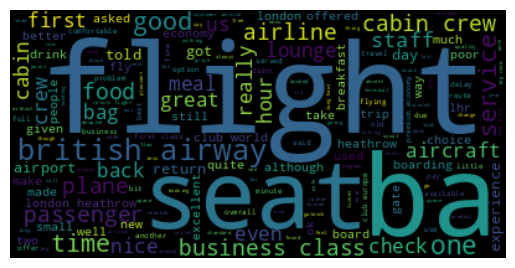

In [58]:
text = " "
for ind in df1.index:
    if df1['tag'][ind] == "Positive":
        text = text + df1['reviews'][ind]

wordcloud_positive = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()


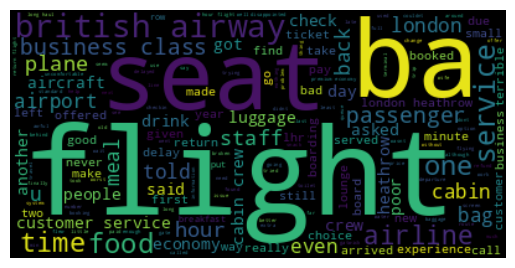

In [59]:
text2= " "
for ind in df1.index:
    if df1['tag'][ind] == "Negative":
        text2 = text2 + df1['reviews'][ind]
wordcloud_negative = WordCloud().generate(text2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

Calculate polarity to gather sentiment tags.

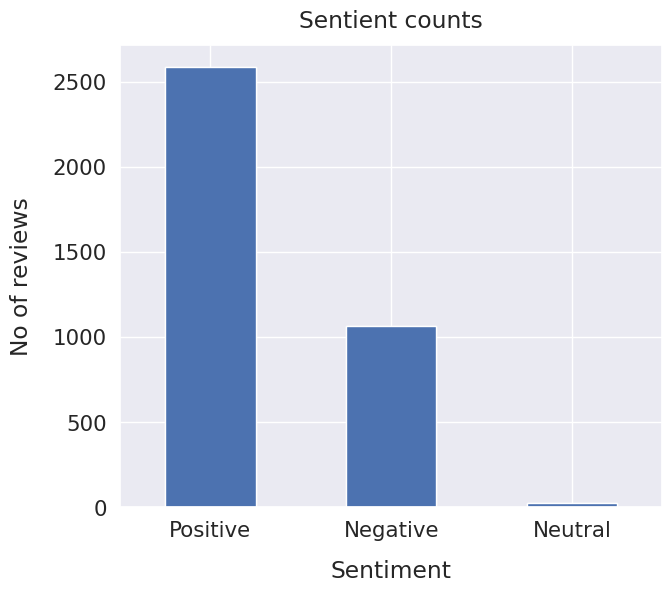

In [60]:
df1['tag'].value_counts().plot(kind='bar')
sns.set(font_scale=1.4)
df1['tag'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sentiment", labelpad=14)
plt.ylabel("No of reviews", labelpad=14)
plt.title("Sentient counts", y=1.02);